In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('summary.csv')

In [4]:
info_keys = [ 
    'unroll',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

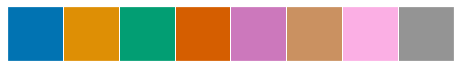

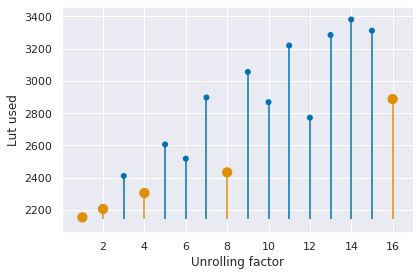

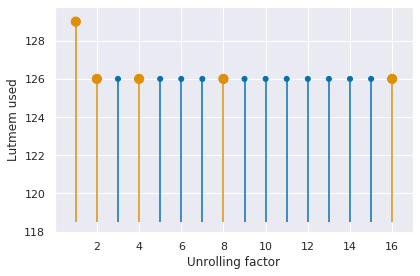

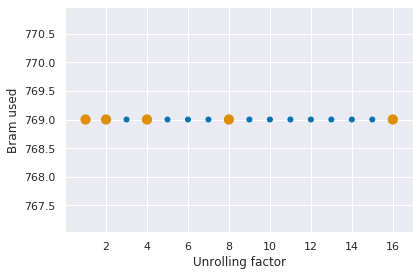

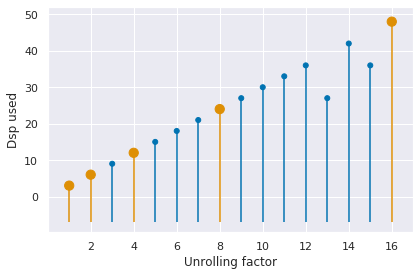

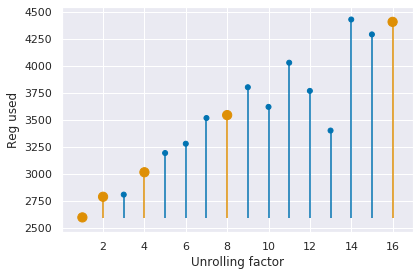

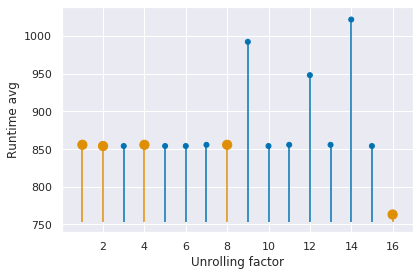

In [30]:
import math
sns.set()

df = df[df.unroll < 32]

pal = sns.color_palette('colorblind', 8).as_hex()
sns.palplot(pal)

for key in keys:
    fig = plt.figure()

    small_df = df[['unroll', key]].copy().sort_values(by='unroll')
    my_color = np.where(128 % small_df['unroll'] == 0, pal[1], pal[0])
    my_size = np.where(128 % small_df['unroll'] == 0, 85, 25)
    ymin = small_df.min()[key] - min(small_df.std()[key] * 10, 10)
    
    plt.vlines(x='unroll', ymax=key, data=small_df, ymin=ymin, color=my_color)
    plt.scatter(x='unroll', y=key, data=small_df, color=my_color, s=my_size)
    
    plt.ylabel(key.replace('_', ' ').capitalize())
    plt.xlabel('Unrolling factor')
    
    fig.tight_layout()
    fig.savefig('absolute-{}.png'.format(key), dpi=200)

    
# fig.suptitle('Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages', y=0.07)